In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from image_helpers import *
from classification import *
from SVM_model import SVM
%load_ext autoreload
%autoreload 2

In [4]:
#Global variables
image_dir = "../training/images/"
gt_dir = "../training/groundtruth/"
files = os.listdir(image_dir)

patch_size = 16
foreground_threshold = 0.25

In [5]:
# Loading a set of images with their groundtruth
imgs, gt_imgs = load_n_images_groundtruth(image_dir, gt_dir, 100)
# Load SVM model
model = SVM(patch_size, foreground_threshold)

In [24]:
model.train(gt_imgs, imgs)

Training...
Accuracy=0.780544


In [1]:
def predict_and_display_image(model, img, gt, real_img):
    '''Predict an image using the given model and display the result
    using pyplot'''
    Zi = model.predict(img)
    
    w = gt.shape[0]
    h = gt.shape[1]
    # Post processing
    Zi = Zi.reshape((int(h/model.patchSize), int(w/model.patchSize)))
    new_labels = post_processing(Zi).reshape(-1)
    # Generate groundtruth from label and concatenate it with the real image
    predicted_im = label_to_img(w, h, model.patchSize, model.patchSize, new_labels)
    cimg = concatenate_images(real_img, predicted_im)
    fig1 = plt.figure(figsize=(10, 10)) # create a figure with the default size 
    plt.imshow(cimg, cmap='Greys_r')

    new_img = make_img_overlay(real_img, predicted_im)

    plt.imshow(new_img)

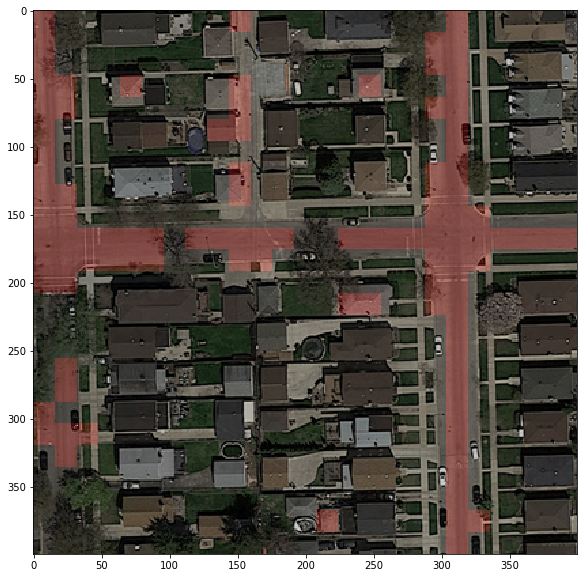

In [28]:
#Predict and Display image
img_idx = 2
predict_and_display_image(model, image_dir + files[img_idx], gt_imgs[img_idx], imgs[img_idx])

In [ ]:
from classification import predict_test_set_images
predict_test_set_images('svm.csv', model)